In [1]:
import pandas as pd
data = pd.read_csv("https://github.com/jennybc/gapminder/raw/master/data-raw/08_gap-every-five-years.tsv", sep='\t')
data.head()

country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106

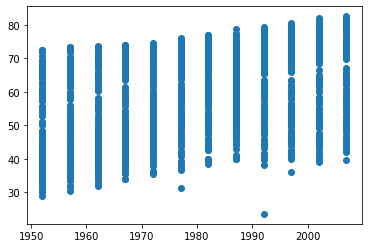

In [3]:
# Part 1
# Exercise 1
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(data.year, data.lifeExp)
plt.show()

Question 1: Is there a general trend (e.g., increasing or decreasing) for life expectancy across time? Is this trend linear? 
<br>
Yes, there is a general increasing linear trend

Question 2: How would you describe the distribution of life expectancy across countries for individual years? 
Is it skewed, or not? Unimodal or not? Symmetric around its center? 
<br>
In the early years, the life expectancy is skewed right, while in the later years it is skewed left.

Question 3: Suppose I fit a linear regression model of life expectancy vs. year (treating it as a continuous variable), and test for a relationship between year and life expectancy, will you reject the null hypothesis of no relationship? (do this without fitting the model yet. I am testing your intuition.) 
<br>
Yes, I would reject the null hypothesis.

Question 4: What would a violin plot of residuals from the linear model in Question 3 vs. year look like? (Again, don’t do the analysis yet, answer this intuitively) 
<br>
It will be similarly skewed.

Question 5: According to the assumptions of the linear regression model, what should that violin plot look like? That is, consider the assumptions the linear regression model you used assumes (e.g., about noise, about input distributions, etc); do you think everything is okay? 
<br>
For each year, the distribution should be symmetric if the line is a perfect fit. This means we likely need extra information to better fit our model.

In [4]:
# Exercise 2
import sklearn.linear_model as lm

model = lm.LinearRegression()
model.fit(data[["year"]], data["lifeExp"])
print("y = " + str(model.coef_[0]) + "x + " + str(model.intercept_))

y = 0.3259038276371518x + -585.6521874415448


Question 6: On average, by how much does life expectancy increase every year around the world?
<br>
0.32590383 years

Question 7: Do you reject the null hypothesis of no relationship between year and life expectancy? Why?
<br>
Yes because as time goes on, life expectancy increases according to our regression.

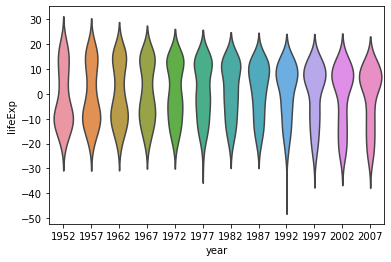

In [5]:
# Exercise 3
import seaborn as sb

res = data["lifeExp"] - model.predict(data[["year"]])
sb.violinplot(x = data["year"], y = res, inner = None)

Question 8: Does the plot of Exercise 3 match your expectations (as you answered Question 4)?
<br>
Yes

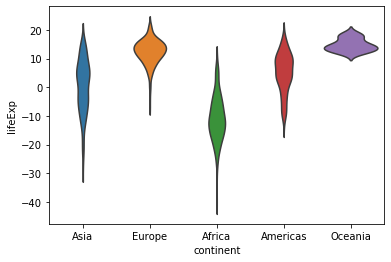

In [6]:
# Exercise 3

sb.violinplot(x = data["continent"], y = res, inner = None)

Question 9: Is there a dependence between model residual and continent? If so, what would that suggest when performing a regression analysis of life expectancy across time?
<br>
Yes. Residuals are small in Asia and the Americas where there is a mixed of developed and developing nations, but larger in Europe and Oceania where most countries are developed and in Africa where most countries are developing.  This suggests that the regression should account for continent.

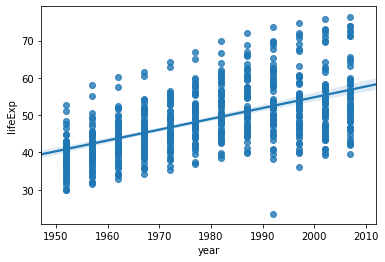

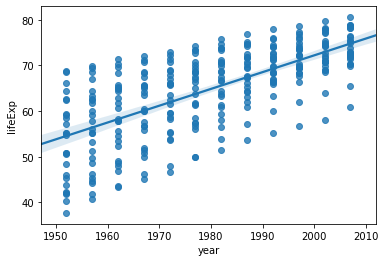

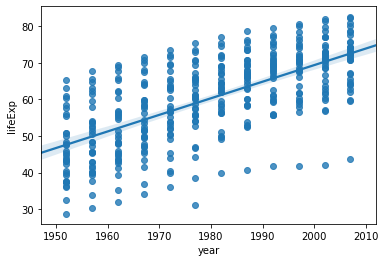

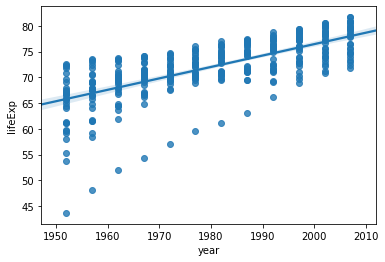

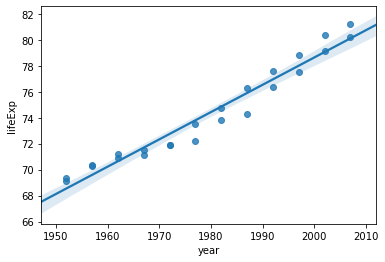

In [6]:
# Exercise 5

africa = data[data['continent'] =='Africa']
americas = data[data['continent'] =='Americas']
asia = data[data['continent'] =='Asia']
europe = data[data['continent'] =='Europe']
oceania = data[data['continent'] =='Oceania']

sb.regplot(data = africa, x = 'year', y = 'lifeExp', fit_reg = True)
plt.show()
sb.regplot(data = americas, x = 'year', y = 'lifeExp', fit_reg = True)
plt.show()
sb.regplot(data = asia, x = 'year', y = 'lifeExp', fit_reg = True)
plt.show()
sb.regplot(data = europe, x = 'year', y = 'lifeExp', fit_reg = True)
plt.show()
sb.regplot(data = oceania, x = 'year', y = 'lifeExp', fit_reg = True)
plt.show()

Question 10: Based on this plot, should your regression model include an interaction term for continent and year? Why?
<br>
Yes because these plots fit the model more accurately than the original

In [8]:
# Exercise 6
from statsmodels.formula.api import ols

dataTemp = data.join(pd.get_dummies(data.continent))
data["africaXyear"] = dataTemp["Africa"]*dataTemp["year"]
data["americasXyear"] = dataTemp["Americas"]*dataTemp["year"]
data["asiaXyear"] = dataTemp["Asia"]*dataTemp["year"]
data["europeXyear"] = dataTemp["Europe"]*dataTemp["year"]
data["oceaniaXyear"] = dataTemp["Oceania"]*dataTemp["year"]

model = ols(formula = "lifeExp ~ year + Africa + Americas + Asia + Europe + africaXyear + americasXyear + asiaXyear + europeXyear", data=dataTemp).fit()
model.predict(dataTemp[["year", "Africa", "Americas", "Asia", "Europe", "Oceania", "africaXyear", "americasXyear", "asiaXyear", "europeXyear", "oceaniaXyear"]])
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Mon, 25 Nov 2019   Prob (F-statistic):               0.00
Time:                        19:59:46   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -341.9080    168.081     -2.034      0.042    -671.577     -12.239
year              0.2103      0.085      2.476      0.013       0.044       0.377
Africa         -182.3499    171.283     -1.065      0.287    -518.298     153.599
Americas       -321.1983    174.675     -1.839      0.066    -663.800      21.403
Asia           -494.9829    173.100     -2.860      0.004    -834.494    -155.471
Europe          -25.5030    173.593     -0.147      0.883    -365.983     314.977
africaXyear       0.0793      0.087      0.916      0.360      -0.090       0.249
americasXyear     0.1574      0.088      1.784      0.075      -0.016       0.330
asiaXyear         0.2429      0.087      2.777      0.006       0.071       0.414
europeXyear       0.0117      0.088      0.133      0.894      -0.160       0.184
==============================================================================
Omnibus:                       27.121   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.106
Skew:                          -0.121   Prob(JB):                     2.65e-10
Kurtosis:                       3.750   Cond. No.                     4.85e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.85e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Question 11: Are all parameters in the model significantly different from zero? If not, which are not significantly different from zero?
<br>
No, only the continent parameters

In [15]:
# Question 12: On average, by how much does life expectancy increase each year for each continent? 
# Africa:
print("For Africa: " + str(model.params['africaXyear']))
print("For Americas: " + str(model.params['americasXyear']))
print("For Asia: " + str(model.params['asiaXyear']))
print("For Europe: " + str(model.params['europeXyear']))
print("For Oceania: " + str(model.params['year']))


For Africa: 0.07925688542268244
For Americas: 0.15737855944102697
For Asia: 0.24285002627713517
For Europe: 0.01165976690026877
For Oceania: 0.21027237762256423


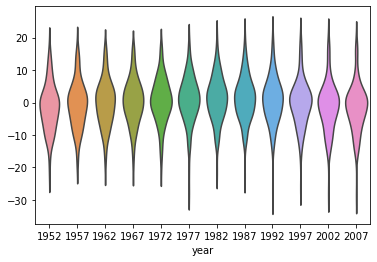

In [9]:
# Exercise 8
res = dataTemp["lifeExp"] - model.predict(dataTemp[["year", "Africa", "Americas", "Asia", "Europe", "Oceania", "africaXyear", "americasXyear", "asiaXyear", "europeXyear", "oceaniaXyear"]])
sb.violinplot(x = data["year"], y = res, inner = None)

This plot fits the expections of a linear regression better than the original.  The distributions are symmetric and not skewed. They all are centered near 0.

In [16]:
# Part 2
# Problem 1 Implement the gradient descent algorithm (either batch or stochastic versions) for multiple linear regression.
def grad_descent(X, y, T, alpha):
    m, n = X.shape # m = #examples, n = #features
    theta = np.zeros(n) # initialize parameters
    f = np.zeros(T) # track loss over time
    for i in range(T):
        # loss for current parameter vector theta
        f[i] = 0.5*np.linalg.norm(X.dot(theta) - y)**2
        # compute steepest ascent at f(theta)
        g = X.T.dot(X.dot(theta) - y)
        # step down the gradient
        theta = theta - alpha*g
    return theta

In [17]:
# Problem 3
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

def logistic_regression(X, y, T, alpha):       
    theta = np.zeros(X.shape[1]) # initialize parameters
    
    for step in range(T):
        output_error_signal = y - sigmoid(np.dot(X, theta))
        # update weights with gradient
        g = np.dot(X.T, output_error_signal)
        theta += alpha * g
        
    return theta

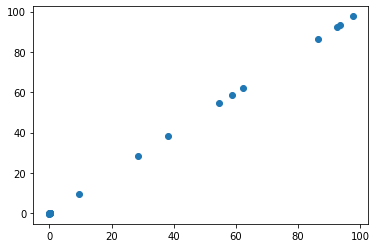

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


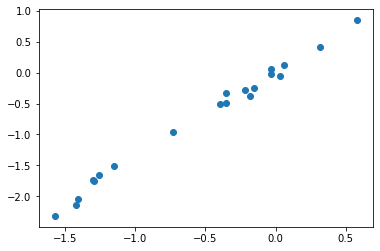

In [12]:
import sklearn.datasets as ds

# Problem 4
# Generate data for linear regression:
gen_data_x, gen_data_y = ds.make_regression(n_samples=100, n_features=20, noise = 1.5)

# Generate data for logistic regression. This is similar to linear, only now values are either 0 or 1.  
log_gen_data_x, dump_y = ds.make_regression(n_samples=100, n_features=20, noise = 1.5)
log_gen_data_y = [0 if i>0 else 1 for i in dump_y]

# Test gradient descent and logistic gradient descent functions
lin_gd = grad_descent(gen_data_x, gen_data_y, 1000, .001)
log_gd = logistic_regression(log_gen_data_x, log_gen_data_y, 1000, .001)

# Model actual regression and plot the difference
# Linear
lin_model = lm.LinearRegression()
lin_model.fit(gen_data_x, gen_data_y)
plt.scatter(lin_model.coef_, lin_gd)
plt.show()

# Logistic
log_model = lm.LogisticRegression()
log_model.fit(log_gen_data_x, log_gen_data_y)
plt.scatter(log_model.coef_, log_gd)
plt.show()

Based on these plots, the gradient descent functions that I wrote work fairly well. The linear is more accurate than the logistic.

My dataset consists of prices of avocados across the US.  I will be trying to predict price based on region. 

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel

# read the dataset into a dataframe
data = pd.read_csv("avocado.csv")

# convert region to numerical variable
le = LabelEncoder()
data["region_index"] = le.fit_transform(data["region"].astype("str"))
data["region_index"] = data["region_index"].replace(0, 54)

X = data[["region_index"]]
y = data["AveragePrice"]

# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X, y.astype('int'))
lda_val = cross_val_score(lda, X, y.astype('int'), cv=10)
print("LDA cross validation score: " + str(lda_val))

# Random Forest
# Using select from model function for model selection
rf = SelectFromModel(RandomForestClassifier(n_estimators = 10))
rf.fit(X, y.astype('int'))
rf_val = cross_val_score(rf.estimator, X, y.astype('int'), cv = 10, scoring = "accuracy")
print("Random forest cross validation score: " + str(rf_val))

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


LDA cross validation score: [0.76725082 0.76725082 0.76725082 0.76725082 0.76725082 0.76725082
 0.76809211 0.76809211 0.76851344 0.76838639]
Random forest cross validation score: [0.76725082 0.76506024 0.76725082 0.76232202 0.76725082 0.69934283
 0.73958333 0.74067982 0.73176083 0.69045005]


In [32]:
from sklearn.model_selection import KFold

# Cross validation for logistic descent
kfd = KFold(n_splits = 10)
ld_val = []
for train, test in kfd.split(y):
    # testing and training data
    X_train = np.array(X)[train]
    X_test = np.array(X)[test]
    y_train = np.array(y)[train]
    y_test = np.array(y)[test]
    # call function
    theta = logistic_regression(X_train, y_train, 1000, .000000000001)
    # create binary var
    p = X_test.dot(theta)
    res = (np.exp(p) / (1 + np.exp(p))) >= .5
    ld_val += [(res == y_test).mean()]
ld_val = np.array(ld_val)
print("Logistic descent cross validation score:", ld_val)

Logistic descent cross validation score: [0.02246575 0.02082192 0.0169863  0.0060274  0.01315068 0.
 0.00712329 0.00273973 0.00164384 0.00054825]


In [34]:
import scipy.stats as stats

# Error estimate
print("LDA error: " + str(stats.sem(lda_val)))
print("Random forest error: " + str(stats.sem(rf_val)))
print("Logisitc descent error: " + str(stats.sem(ld_val)))

LDA error: 0.00017107436110744506
Random forest error: 0.009089085181519749
Logisitc descent error: 0.0027079329016055694


In [36]:
import scipy.stats as stats

# t tests
lda_test = stats.ttest_rel(lda_val, ld_val)
rf_test = stats.ttest_rel(rf_val, ld_val)
print("T test for LDA: " + str(lda_test))
print("T test for random forest: " + str(rf_test))

T test for LDA: Ttest_relResult(statistic=269.05513484124094, pvalue=6.887766206227208e-19)
T test for random forest: Ttest_relResult(statistic=103.04868699336485, pvalue=3.8724294705340776e-15)


Because of these low p-values, we conclude that the logistic regression results are significantly different from those of the random forest and LDA